In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from battery import Battery
%matplotlib widget

In [2]:
# Load the data into the variable DF
df=pd.read_csv('PV_raw_data.csv')

df

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W)
0,1,1,0,0,0,9.5,3.4,0.15,0.0,9.5,0.0,0.0
1,1,1,1,0,0,9.2,3.6,0.15,0.0,9.2,0.0,0.0
2,1,1,2,0,0,9.0,3.4,0.15,0.0,9.0,0.0,0.0
3,1,1,3,0,0,8.9,3.3,0.15,0.0,8.9,0.0,0.0
4,1,1,4,0,0,8.8,3.1,0.15,0.0,8.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12,31,19,0,0,11.5,0.0,0.16,0.0,11.5,0.0,0.0
8756,12,31,20,0,0,11.1,0.0,0.16,0.0,11.1,0.0,0.0
8757,12,31,21,0,0,10.7,0.0,0.16,0.0,10.7,0.0,0.0
8758,12,31,22,0,0,10.3,0.0,0.16,0.0,10.3,0.0,0.0


In [3]:
#drop data points that have zero ac output
df_cleaned=df.copy()
df_cleaned

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W)
0,1,1,0,0,0,9.5,3.4,0.15,0.0,9.5,0.0,0.0
1,1,1,1,0,0,9.2,3.6,0.15,0.0,9.2,0.0,0.0
2,1,1,2,0,0,9.0,3.4,0.15,0.0,9.0,0.0,0.0
3,1,1,3,0,0,8.9,3.3,0.15,0.0,8.9,0.0,0.0
4,1,1,4,0,0,8.8,3.1,0.15,0.0,8.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12,31,19,0,0,11.5,0.0,0.16,0.0,11.5,0.0,0.0
8756,12,31,20,0,0,11.1,0.0,0.16,0.0,11.1,0.0,0.0
8757,12,31,21,0,0,10.7,0.0,0.16,0.0,10.7,0.0,0.0
8758,12,31,22,0,0,10.3,0.0,0.16,0.0,10.3,0.0,0.0


In [4]:
#drop unneeded comlumns
df_cleaned.drop(columns=['Beam Irradiance (W/m2)'], inplace=True)
df_cleaned.drop(columns=['Diffuse Irradiance (W/m2)'], inplace=True)
df_cleaned.drop(columns=['Ambient Temperature (C)'], inplace=True)
df_cleaned.drop(columns=['Wind Speed (m/s)'], inplace=True)
df_cleaned.drop(columns=['Plane of Array Irradiance (W/m2)'], inplace=True)
df_cleaned.drop(columns=['Cell Temperature (C)'], inplace=True)
df_cleaned.drop(columns=['DC Array Output (W)'], inplace=True)
df_cleaned.drop(columns=['Albedo'],inplace=True)


In [5]:
df_cleaned

,Month,Day,Hour,AC System Output (W)
0,1,1,0,0.0
1,1,1,1,0.0
2,1,1,2,0.0
3,1,1,3,0.0
4,1,1,4,0.0
...,...,...,...,...
8755,12,31,19,0.0
8756,12,31,20,0.0
8757,12,31,21,0.0
8758,12,31,22,0.0


In [6]:
#Transform the DF into datetime
df_cleaned['year'] = 2023
df['year'] = 2023

# Create a datetime column
df_cleaned['datetime'] = pd.to_datetime(df_cleaned[['year', 'Month', 'Day', 'Hour']])
df['datetime'] = pd.to_datetime(df[['year', 'Month', 'Day', 'Hour']])

# Set datetime as the index
df_cleaned.set_index('datetime', inplace=True)
df.set_index('datetime', inplace=True)

# Drop the dummy year column as it is no longer needed
df_cleaned.drop(columns=['Month','Day','Hour','year'], inplace=True)
df.drop(columns=['Month','Day','Hour','year'], inplace=True)

df_cleaned

,AC System Output (W)
datetime,
2023-01-01 00:00:00,0.0
2023-01-01 01:00:00,0.0
2023-01-01 02:00:00,0.0
2023-01-01 03:00:00,0.0
2023-01-01 04:00:00,0.0
...,...
2023-12-31 19:00:00,0.0
2023-12-31 20:00:00,0.0
2023-12-31 21:00:00,0.0


In [7]:
#Set some parameters :
min_energy_consumption = 6
max_energy_consumption = 100

#Create the battery :
Battery_12MW_90MWh = Battery(power_capacity=12, energy_capacity=90, efficiency=1)

#Create some Series to save data in and join to the main data frame later:
energy_consumption_battery=pd.Series(0,index=df_cleaned.index)
energy_consumption_no_battery=pd.Series(0,index=df_cleaned.index)
excess_energy=pd.Series(0,index=df_cleaned.index)
Battery_charge=pd.Series(0,index=df_cleaned.index)


In [8]:
#convert AC power output into MWh
df_cleaned['Energy Generated (MWh)']=df_cleaned['AC System Output (W)']*0.000001
df['Energy Generated (MWh)']=df['AC System Output (W)']*0.000001

for date,ac_output_mwh in df_cleaned['Energy Generated (MWh)'].items():
    Battery_charge[date]=Battery_12MW_90MWh.get_charge()
    if ac_output_mwh > min_energy_consumption: #minimum to enter the grid
        
        if ac_output_mwh > max_energy_consumption: #maximum to enter the grid
            
            # set energy consumption to max
            energy_consumption_battery[date] = max_energy_consumption
            energy_consumption_no_battery[date]=max_energy_consumption
            
            # find the excess energy 
            excess_energy[date]=ac_output_mwh-max_energy_consumption
            
            # charge the battery with the excess energy
            # the battery will only charge according to the power_capacity
            Battery_12MW_90MWh.charge(power=excess_energy[date]) 
            
        else: # energy is within the max and min
           
            energy_consumption_battery[date] = ac_output_mwh
            energy_consumption_no_battery[date]=ac_output_mwh
            
    else: # energy less than min
        
        if Battery_12MW_90MWh.get_charge() > min_energy_consumption: # to make sure that we dont discharge power that wont be enough to power the grid
            energy_consumption_battery[date] = Battery_12MW_90MWh.discharge(power=12-ac_output_mwh) + ac_output_mwh
        energy_consumption_no_battery[date]=0
        
    if energy_consumption_battery[date] <= min_energy_consumption: # when no energy is left in the battery, and energy is less than min
        Battery_12MW_90MWh.charge(power=ac_output_mwh)
        energy_consumption_battery[date] = 0

C:\Users\alyou\AppData\Local\Temp\ipykernel_8552\3608130035.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.264380753999999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Battery_charge[date]=Battery_12MW_90MWh.get_charge()
C:\Users\alyou\AppData\Local\Temp\ipykernel_8552\3608130035.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '19.7548438' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  energy_consumption_battery[date] = ac_output_mwh
C:\Users\alyou\AppData\Local\Temp\ipykernel_8552\3608130035.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '19.7548438' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  e

C:\Users\alyou\AppData\Local\Temp\ipykernel_8552\1501232530.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  avg_monthly_battery_charge=Battery_charge.resample('M').mean()


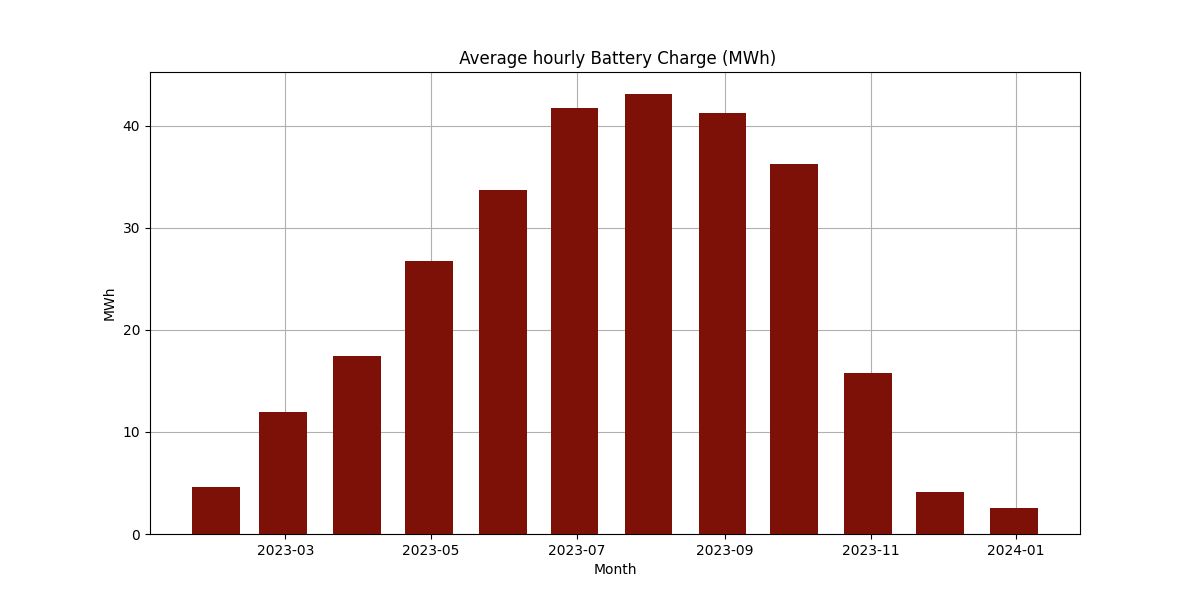

In [9]:
#plot the average hourly battery charge
plt.figure(figsize=(12, 6))


avg_monthly_battery_charge=Battery_charge.resample('M').mean()

plt.bar(avg_monthly_battery_charge.index,avg_monthly_battery_charge,label='Battery Charge Mwh',width=20,color='#7D1007',zorder=3)

plt.title(' Average hourly Battery Charge (MWh)')
plt.xlabel('Month')
plt.ylabel('MWh')
plt.grid(True,zorder=0)
plt.show()

In [10]:
# Explicitly set any 0 values to NaN if needed
energy_consumption_battery.replace(0, np.nan, inplace=True)
energy_consumption_no_battery.replace(0, np.nan, inplace=True)
df_cleaned.replace(0, np.nan, inplace=True)



# Drop NaN values
energy_consumption_battery_cleaned = energy_consumption_battery.dropna()
energy_consumption_no_battery_cleaned = energy_consumption_no_battery.dropna()






In [11]:
print(f"the number of hours where the energy is greater than minimum speicified energy ({min_energy_consumption}) MWh is ({len(energy_consumption_battery_cleaned) - len(energy_consumption_no_battery_cleaned) }) hours after a battery was added ")
print(f"the number of hours where the energy is less than minimum speicified energy ({min_energy_consumption}) MWh is ({len(df_cleaned.dropna(inplace=False)) - len(energy_consumption_no_battery_cleaned)}) hours")

the number of hours where the energy is greater than minimum speicified energy (6) MWh is (1551) hours after a battery was added 
the number of hours where the energy is less than minimum speicified energy (6) MWh is (363) hours


In [12]:
energy_consumption_cleaned_month=energy_consumption_battery_cleaned.resample('M').sum()
energy_consumption_no_battery_cleaned_month=energy_consumption_no_battery_cleaned.resample('M').sum()

C:\Users\alyou\AppData\Local\Temp\ipykernel_8552\2933411344.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  energy_consumption_cleaned_month=energy_consumption_battery_cleaned.resample('M').sum()
C:\Users\alyou\AppData\Local\Temp\ipykernel_8552\2933411344.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  energy_consumption_no_battery_cleaned_month=energy_consumption_no_battery_cleaned.resample('M').sum()


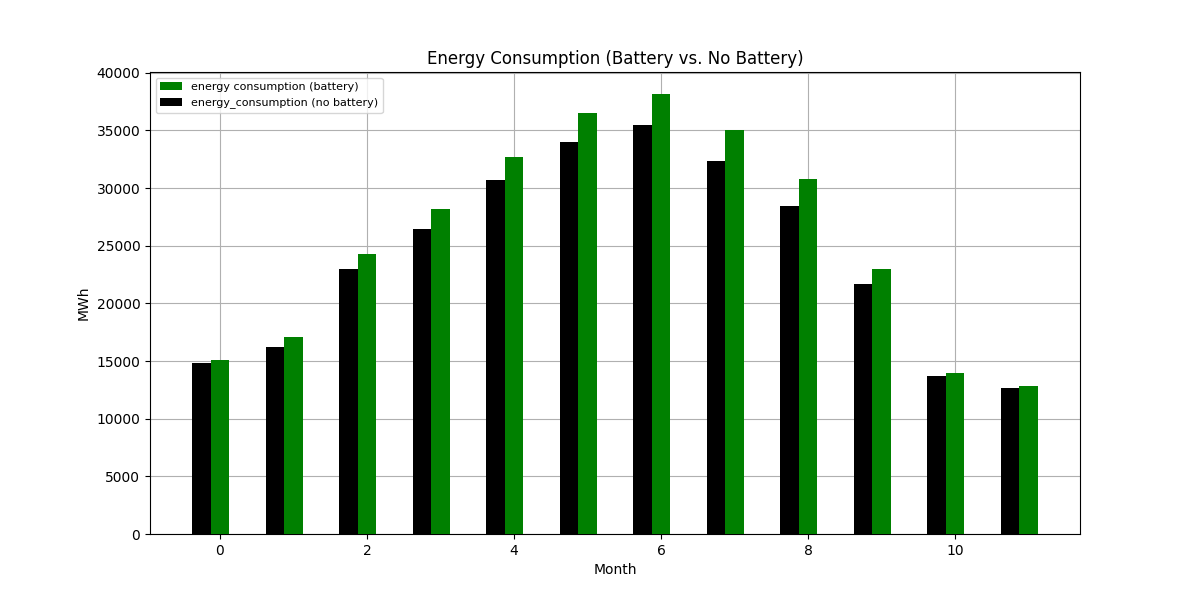

In [13]:
bar_width = 0.25
index = np.arange(len(energy_consumption_cleaned_month.index))



plt.figure(figsize=(12, 6))

bar2 = plt.bar(index, energy_consumption_cleaned_month, bar_width,label='energy consumption (battery)', color='g',zorder=3)
bar3 = plt.bar(index - bar_width, energy_consumption_no_battery_cleaned_month, bar_width, label='energy_consumption (no battery)', color='#000000',zorder=3)
plt.title('Energy Consumption (Battery vs. No Battery)')
plt.xlabel('Month')
plt.ylabel('MWh')
plt.grid(True,zorder=0)
legend_fontsize = 8  # Smaller font size for the legend
plt.legend(loc='upper left', fontsize=legend_fontsize, prop={'size': legend_fontsize})
plt.show()

In [14]:
#now we want to know energy generated vs energy consumed
#resample df_cleaned to monthly
df_cleaned_month=df_cleaned.resample('M').sum()

C:\Users\alyou\AppData\Local\Temp\ipykernel_8552\2211945167.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cleaned_month=df_cleaned.resample('M').sum()


In [15]:
#find the percentage of total consumption for battery and no battery
percentage_consum_bat=(energy_consumption_cleaned_month/df_cleaned_month['Energy Generated (MWh)'])*100
percentage_consum_no_bat=(energy_consumption_no_battery_cleaned_month/df_cleaned_month['Energy Generated (MWh)'])*100


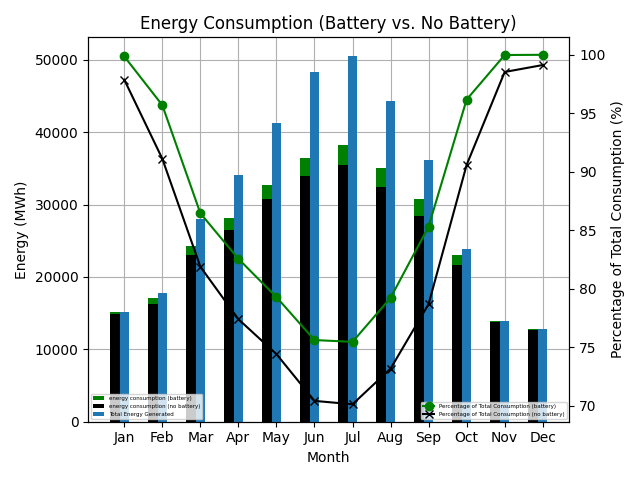

In [16]:

bar_width = 0.25
index = np.arange(len(df_cleaned_month.index))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create figure and axis objects
fig, ax1 = plt.subplots()



bar1 = plt.bar(index - bar_width, energy_consumption_cleaned_month, bar_width,label='energy consumption (battery)', color='g',zorder=3)
bar2 = plt.bar(index-bar_width, energy_consumption_no_battery_cleaned_month, bar_width, label='energy consumption (no battery)', color='#000000',zorder=3)
bar3 = plt.bar(index, df_cleaned_month['Energy Generated (MWh)'], bar_width, label='Total Energy Generated',zorder=3)
ax2 = ax1.twinx()
ax1.grid(True,zorder=0)

line1 = ax2.plot(index, percentage_consum_bat, label='Percentage of Total Consumption (battery)', color='g', marker='o',zorder=4)
line1 = ax2.plot(index, percentage_consum_no_bat, label='Percentage of Total Consumption (no battery)', color='#000000', marker='x',zorder=4)

plt.title('Energy Consumption (Battery vs. No Battery)')
plt.xlabel(months)
ax1.set_xlabel('Month')
ax1.set_xticks(index)
ax1.set_xticklabels(months)

ax1.set_ylabel('Energy (MWh)')
ax2.set_ylabel('Percentage of Total Consumption (%)')
legend_fontsize = 4  # Smaller font size for the legend
ax1.legend(loc='lower left', fontsize=legend_fontsize, prop={'size': legend_fontsize})
ax2.legend(loc='lower right', fontsize=legend_fontsize, prop={'size': legend_fontsize})
plt.tight_layout()


In [17]:
#Prepare the data to be exported as csv
energy_consumption_battery.replace(np.nan, 0, inplace=True)
energy_consumption_no_battery.replace(np.nan, 0, inplace=True)
df_energy=pd.concat([df_cleaned,energy_consumption_no_battery,excess_energy,Battery_charge,energy_consumption_battery],axis=1)
df_new=pd.concat([df,energy_consumption_no_battery,excess_energy,Battery_charge,energy_consumption_battery],axis=1)

df_new.rename(columns={0:'Energy Consumption (no battery)',1:'Excess Energy',2:'Battery Charge',3: 'Energy Consumption Battery'},errors="raise",inplace=True)
df_energy.rename(columns={0:'Energy Consumption (no battery)',1:'Excess Energy',2:'Battery Charge',3: 'Energy Consumption Battery'},errors="raise",inplace=True)

# df

In [18]:
#export the data as csv
df_new.to_csv('Processed_data_12MW_90MWh.csv')

In [19]:
energy_difference=energy_consumption_cleaned_month - energy_consumption_no_battery_cleaned_month


print (f"the total yearly energy stored by the battery is {energy_difference.sum()} MWh")

the total yearly energy stored by the battery is 18089.331890130008 MWh
